In [219]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [220]:
df = pd.read_csv("../data-final.csv", delimiter="\t")

### Exploratory Data Analysis

In [221]:
print("Number of Studies : ",len(df))
print("Number of variables : ",df.shape[-1])

Number of Studies :  1015341
Number of variables :  110


In [222]:
# Display all the columns
pd.options.display.max_columns = None
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [223]:
# Question columns
questions = df.columns[:50]
# Answering time columns
q_times = df.columns[50:100]

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [225]:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013275e+06,1.013275e+06,1.013275e+06,1.013558e+06,1.015341e+06,1.015341e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,3.285969e+00,3.165072e+00,3.846466e+00,2.663756e+00,2.843086e+00,2.841154e+00,3.050394e+00,2.683485e+00,3.088511e+00,2.773504e+00,2.255316e+00,3.831103e+00,2.259957e+00,3.927497e+00,2.270857e+00,3.743075e+00,2.195806e+00,3.689389e+00,3.789116e+00,3.592351e+00,3.297999e+00,2.930295e+00,3.975280e+00,2.617866e+00,2.625832e+00,2.831821e+00,3.698187e+00,2.465306e+00,3.200695e+00,3.590596e+00,3.654636e+00,2.075933e+00,4.000068e+00,1.999891e+00,3.792905e+00,1.894605e+00,3.976375e+00,3.182453e+00,4.122993e+00,3.958441e+00,9.701995e+04,8.341048e+03,1.164124e+04,7.645369e+03,7.143988e+03,7.453523e+03,1.089923e+04,7.039182e+03,6.157744e+03,7.417393e+03,9.434205e+03,9.247126e+03,7.728744e+03,1.284382e+04,1.037450e+04,8.123314e+03,7.107811e+03,7.942962e+03,5.524527e+03,4.755129e+03,1.827161e+04,8.798989e+03,6.635657e+03,9.045579e+03,1.117948e+04,6.255786e+03,8.248705e+03,8.956072e+03,5.365630e+03,6.046344e+03,1.229667e+04,1.025403e+04,9.066488e+03,9.198059e+03,9.035055e+03,1.172584e+04,5.556954e+03,1.113842e+04,5.432479e+03,1.078870e+04,8.387317e+03,1.301447e+04,7.190824e+03,1.328973e+04,6.281839e+03,8.256577e+03,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149510e+03,8.262611e+02,9.590748e+02,6.754233e+02,2.701410e+03,1.045211e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,1.345600e+00,1.228272e+00,1.163348e+00,1.252999e+00,1.273892e+00,1.326569e+00,1.293009e+00,1.343042e+00,1.297141e+00,1.323155e+00,1.339971e+00,1.140587e+00,1.277323e+00,1.127688e+00,1.171207e+00,1.222431e+00,1.120320e+00,1.095536e+00,1.166743e+00,1.080791e+00,1.176791e+00,1.390062e+00,1.044728e+00,1.251815e+00,1.274595e+00,1.416194e+00,1.128066e+00,1.140957e+00,1.276230e+00,1.053185e+00,1.157155e+00,1.112600e+00,1.097169e+00,1.0902

"IPC The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions"

In [226]:
# Keep only records where IPC = 1 and drop the NaNs
df = df[df['IPC']== 1].dropna()
# IPC:~300 000 != 1  /  NA: ~3 000 
df.shape

(694886, 110)

In [227]:
# Drop the records where the localisation (country, latitude, longitude) is NONE
df = df[df['country']!='NONE']
df = df[df['lat_appx_lots_of_err']!='NONE']
df = df[df['long_appx_lots_of_err']!='NONE']

In [228]:
# set some variables as float
df['endelapse'] = df['endelapse'].astype(float)
df['lat_appx_lots_of_err'] = df['lat_appx_lots_of_err'].astype(float)
df['long_appx_lots_of_err'] = df['long_appx_lots_of_err'].astype(float)

# set categorical data
df['country'] = df['country'].astype(str).astype('category')

# set datetime data
df['dateload'] = pd.to_datetime(df['dateload'])

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685282 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: category(1), datetime64[ns](1), float64(107), int64(1)
memory usage: 576.4 MB


In [230]:
# Discard the records where users didn't answer to more than 90% of the questions
n_questions= 50
thresold = n_questions*0.9
df = df[(df[questions] > 0).sum(axis=1) > thresold]

In [231]:
print(df[questions].max().max())
print(df[questions].min().min())
df.shape

5.0
0.0


(681623, 110)

In [232]:
# There are some negative times
df[q_times].describe().mean(axis=1)

count    6.816230e+05
mean     9.742890e+03
std      6.991661e+05
min     -5.229477e+06
25%      2.413380e+03
50%      3.452640e+03
75%      5.184390e+03
max      3.864440e+08
dtype: float64

In [234]:
# We discard the records where there are some negative times (~400)
df = df[(df[q_times]<0).sum(axis=1) == 0]
df.shape

(681214, 110)

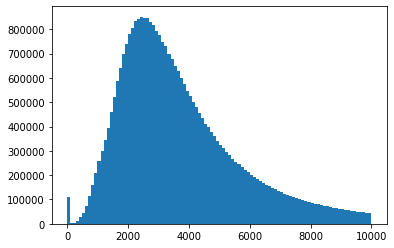

In [252]:
# There are lots of answers time equal to 0
distrib_t = plt.hist(df[q_times].values.flatten(),100, [0,10000] )

In [236]:
# One reason for this is that some users skipped some questions
print(df.loc[34,'EXT3_E']) # temps
print(df.loc[34,'EXT3']) #question (quand c'est 0 c'est que la personne n'a pas répondu)

0.0
0.0


In [237]:
print((df[questions].values.flatten() == 0).sum())
print((df[q_times].values.flatten() == 0).sum())

108933
247412


In [238]:
# For the rest, should be a measurement error
df[q_times][((df[q_times]==0).sum(axis=1) != (df[questions]==0).sum(axis=1))].head() # Time df


,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
2562,0.0,1601.0,3465.0,3580.0,2223.0,3764.0,3319.0,2203.0,23980.0,2948.0,1849.0,4137.0,6740.0,0.0,55506.0,19530.0,2332.0,1781.0,35792.0,16272.0,269787.0,1831.0,2022.0,5211.0,3164.0,57705.0,5500.0,3045.0,4381.0,2561.0,19557.0,28113.0,3855.0,37478.0,52115.0,3426.0,2008.0,23541.0,13948.0,4487.0,1895.0,4153.0,5871.0,7872.0,9915.0,3251.0,1598.0,4173.0,2829.0,6233.0
5267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6155,0.0,0.0,3072.0,1400.0,1576.0,5256.0,3199.0,2488.0,8269.0,2520.0,0.0,1952.0,1704.0,2184.0,2648.0,5023.0,1728.0,1479.0,1888.0,1264.0,0.0,0.0,5448.0,1832.0,2192.0,1416.0,2544.0,1616.0,4152.0,1912.0,0.0,2835.0,4216.0,64022.0,1952.0,4735.0,2312.0,2560.0,1112.0,2600.0,0.0,2864.0,824.0,2464.0,1872.0,5232.0,1816.0,1434.0,2328.0,1896.0
6581,3860.0,7227.0,228.0,3833.0,11256.0,10572.0,0.0,10374.0,8762.0,20996.0,15980.0,0.0,5154.0,7299.0,0.0,6867.0,6059.0,11068.0,0.0,0.0,3773.0,0.0,7279.0,5492.0,6487.0,7006.0,10782.0,9638.0,10061.0,5282.0,0.0,0.0,8485.0,4653.0,5120.0,4598.0,8903.0,5074.0,0.0,0.0,735.0,5785.0,0.0,0.0,0.0,2576.0,11310.0,10035.0,0.0,11116.0
7099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
df[questions][((df[q_times]==0).sum(axis=1) != (df[questions]==0).sum(axis=1))].head() # Answers df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
2562,1.0,3.0,2.0,5.0,2.0,4.0,1.0,5.0,3.0,5.0,4.0,4.0,4.0,0.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,3.0,2.0,3.0,2.0,4.0,4.0,1.0,1.0,5.0,4.0,2.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,4.0,5.0,4.0,5.0,4.0
5267,1.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,4.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,2.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,4.0,5.0,5.0,5.0
6155,4.0,3.0,4.0,3.0,5.0,1.0,3.0,3.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,5.0,4.0,5.0,5.0,3.0,1.0,4.0,4.0,5.0,2.0,5.0,2.0,5.0,5.0,5.0,2.0,3.0,5.0,3.0,2.0,1.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,1.0,4.0,5.0,4.0,5.0
6581,2.0,5.0,3.0,3.0,1.0,2.0,1.0,4.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,1.0,1.0,3.0,2.0,4.0,4.0,3.0,4.0,3.0,3.0,1.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,5.0,4.0,4.0,2.0,4.0,1.0,5.0,1.0,3.0,4.0,3.0,5.0
7099,3.0,5.0,5.0,2.0,5.0,1.0,4.0,5.0,2.0,4.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,5.0,1.0,2.0,1.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,2.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,4.0


In [240]:
# Discard all the records with time equal to 0 if the corresponding answer is not equal to 0 (~4000)
df = df[((df[q_times]==0).sum(axis=1) == (df[questions]==0).sum(axis=1))]

Pour les temps trop long on peut partir du principe que le mec est allé se faire un tennis au milieu du questionnaire, donc on garde ses réponses mais faudra mettre un filtre sur ce genre de cas quand on travaillera avec le temps
D'ailleurs on peut faire pareil pour les cas ou le temps = 0 plûtot que les jeter. 

In [241]:
# Compute the score
# Codebook.pkl attributes score points with respect to the personality trait (-1 if negative, 1 if positive)
codebook = pd.read_pickle('codebook.pkl')
codebook = codebook.map(lambda c : int(c))

In [242]:
traits=['EXT','EST','AGR','CSN','OPN']
scores=pd.DataFrame(0,index = df.index, columns= traits)
for t in traits:
    trait_questions= [q for q in questions if t in q]
    for tq in trait_questions:
        scores[t] += df[tq]*codebook[tq]
            


In [243]:
scores.describe()

,EXT,EST,AGR,CSN,OPN
count,677156.000000,677156.000000,677156.000000,677156.000000,677156.000000
mean,-0.793929,-18.801133,13.536024,9.361121,21.231605
std,9.081171,8.583039,7.353370,7.386738,6.213334
min,-22.000000,-40.000000,-16.000000,-15.000000,-8.000000
25%,-8.000000,-25.000000,9.000000,4.000000,17.000000
50%,-1.000000,-19.000000,14.000000,9.000000,22.000000
75%,6.000000,-13.000000,19.000000,15.000000,26.000000
max,22.000000,3.000000,27.000000,28.000000,34.000000


In [244]:
# Export the data to a pickle
pd.concat([df,scores], axis = 1).drop(questions.append(q_times),axis = 1).to_pickle('scores.pkl')

In [245]:
# Min Max normalization of the score
n_scores=(scores-scores.min())/(scores.max()-scores.min())
n_scores.describe()

,EXT,EST,AGR,CSN,OPN
count,677156.000000,677156.000000,677156.000000,677156.000000,677156.000000
mean,0.481956,0.492997,0.686884,0.566538,0.695991
std,0.206390,0.199606,0.171009,0.171785,0.147937
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.318182,0.348837,0.581395,0.441860,0.595238
50%,0.477273,0.488372,0.697674,0.558140,0.714286
75%,0.636364,0.627907,0.813953,0.697674,0.809524
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [246]:
n_scores.rename

<bound method DataFrame.rename of               EXT       EST       AGR       CSN       OPN
0        0.863636  0.651163  0.720930  0.534884  0.833333
1        0.272727  0.627907  0.837209  0.651163  0.595238
2        0.386364  0.604651  0.790698  0.581395  0.738095
3        0.409091  0.534884  0.697674  0.372093  0.690476
5        0.545455  0.697674  0.697674  0.651163  0.809524
...           ...       ...       ...       ...       ...
1015334  0.681818  0.558140  0.744186  0.581395  0.619048
1015335  0.840909  0.139535  0.720930  0.418605  0.714286
1015337  0.545455  0.186047  0.720930  0.441860  0.833333
1015339  0.318182  0.395349  0.674419  0.674419  0.738095
1015340  0.704545  0.534884  0.790698  0.441860  0.880952

[677156 rows x 5 columns]>

In [247]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1,MY,3.1698,101.7060
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1,GB,51.7500,-1.2500
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,4834.0,5064.0,1160.0,2664.0,6711.0,3344.0,2512.0,6264.0,6992.0,4592.0,2808.0,1776.0,3280.0,4520.0,2640.0,5408.0,3647.0,3183.0,1575.0,672.0,6375.0,4727.0,3775.0,1647.0,1233.0,8694.0,2904.0,2152.0,2856.0,2848.0,4288.0,4360.0,7328.0,3976.0,7895.0,2640.0,1760.0,5720.0,9032.0,3928.0,2104.0,5488.0,3656.0,4352.0,2681.0,3272.0,2640.0,1568.0,1640.0,3192.0,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3.0,1,SE,59.3333,18.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

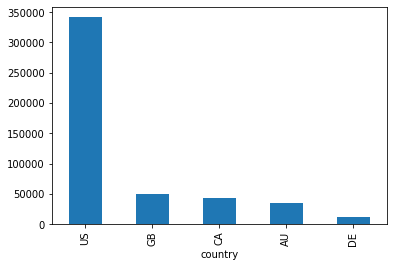

In [307]:
# Top 5 countries which answered studies the most
d = df.groupby('country')['country'].count().sort_values(ascending = False)[:5]
d.plot.bar()

In [315]:
# Dataframe containing only the top 5 countries
top_countries = ['US','GB','CA','AU','DE']
topdf = df[(df['country']=='US')|(df['country']=='GB')|(df['country']=='CA')|(df['country']=='AU')|(df['country']=='DE')]